# AutoTrader (AT) Car Sales Prediction

**Problem Statement**
AutoTrader (AT) machine learning engineers and data scientists in the implementation of the price indicator feature in AT’s website.Our main task is to produce a regression model for predicting the selling price given the characteristics of the cars in the historical data given. 

**Business Goal**
We are required to model the price of cars with the available independents variables. It will be use by the management to understand how exactly the prices varry with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels

In [32]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

## Step 1: Load and Understand the Dataset

Let's start with the following steps:
1. Importing data using the pandas library
2. Understanding the structure of the data

In [74]:
# load dataset
df = pd.read_csv('adverts.xls')
df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [75]:
# check unique values of car colors
df['standard_colour'].unique()

array(['Grey', 'Blue', 'Brown', 'Red', 'Bronze', 'Black', 'White',
       'Silver', nan, 'Purple', 'Green', 'Orange', 'Yellow', 'Turquoise',
       'Gold', 'Multicolour', 'Beige', 'Burgundy', 'Pink', 'Maroon',
       'Magenta', 'Navy', 'Indigo'], dtype=object)

In [76]:
# check unique values of car standard make
df['standard_make'].unique()

array(['Volvo', 'Jaguar', 'SKODA', 'Vauxhall', 'Land Rover', 'Audi',
       'Mercedes-Benz', 'Volkswagen', 'Peugeot', 'SEAT', 'MINI', 'BMW',
       'Nissan', 'Mitsubishi', 'Ferrari', 'Citroen', 'Toyota', 'Kia',
       'Renault', 'Fiat', 'Honda', 'Bentley', 'DS AUTOMOBILES', 'Hyundai',
       'Aston Martin', 'McLaren', 'Smart', 'Alfa Romeo', 'Porsche',
       'Abarth', 'Mazda', 'Suzuki', 'MG', 'Dacia', 'Subaru', 'SsangYong',
       'Maserati', 'Saab', 'Rolls-Royce', 'Lexus', 'Jeep', 'Panther',
       'Chevrolet', 'Lamborghini', 'Daihatsu', 'Dodge', 'Isuzu', 'Lotus',
       'Tesla', 'TVR', 'GMC', 'Rover', 'Cadillac', 'Infiniti', 'Alpine',
       'Chrysler', 'Triumph', 'Morgan', 'Dax',
       'London Taxis International', 'Daimler', 'CUPRA', 'Perodua',
       'Lincoln', 'Bugatti', 'Great Wall', 'Replica', 'Opel', 'AC',
       'Proton', 'Lancia', 'Austin', 'Morris', 'Westfield', 'Maybach',
       'Corvette', 'Tiger', 'LEVC', 'Iveco', 'Caterham', 'Hummer',
       'Carbodies', 'Jensen', 'Int

In [77]:
# check unique values of car standard model
df['standard_model'].unique()

array(['XC90', 'XF', 'Yeti', ..., 'Sera', 'Pininfarina', '480'],
      dtype=object)

In [78]:
df['vehicle_condition'].unique()

array(['NEW', 'USED'], dtype=object)

In [79]:
df['year_of_registration'].unique()

array([  nan, 2011., 2017., 2016., 2015., 2013., 2008., 2019., 2010.,
       2012., 2018., 2009., 1984., 2014., 2003., 2006., 2020., 2005.,
       2000., 2002., 2007., 2004., 1991., 2001., 1986., 1998., 1990.,
       1993., 1987., 1994., 1999., 1970., 1988., 1995., 1997., 1969.,
       1992., 1989., 1996., 1976., 1983., 1980., 1973., 1962., 1967.,
       1972., 1982., 1968., 1979., 1964., 1933., 1981., 1985., 1978.,
       1971., 1974., 1966., 1977., 1961., 1965., 1007., 1957., 1515.,
       1963., 1063., 1954., 1975., 1955., 1009., 1016., 1960., 1956.,
       1959., 1909., 1934., 1958., 1010., 1950., 1008., 1018.,  999.,
       1017., 1952., 1006., 1015.])

The dataset contains cars from the year 999 - 2023. From the information gotten from the Autotrader website, years are from 1950 - 2023. Wish i believe is well more inform for our analysis

In [80]:
# return the shape of dataset
df.shape

(402005, 12)

In [81]:
df.describe()

,public_reference,mileage,year_of_registration,price
count,4.020050e+05,401878.000000,368694.000000,4.020050e+05
mean,2.020071e+14,37743.595656,2015.006206,1.734197e+04
std,1.691662e+10,34831.724018,7.962667,4.643746e+04
min,2.013072e+14,0.000000,999.000000,1.200000e+02
25%,2.020090e+14,10481.000000,2013.000000,7.495000e+03
50%,2.020093e+14,28629.500000,2016.000000,1.260000e+04
75%,2.020102e+14,56875.750000,2018.000000,2.000000e+04
max,2.020110e+14,999999.000000,2020.000000,9.999999e+06


In [82]:
# return dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


## Step 2: Data Cleaning

In [83]:
missing_values = {
    'columns': np.array(df.columns),
    'no missing': df.isnull().sum().values,
    '% missing': (df.isnull().sum().values / len(df)) * 100
}

missing_df = pd.DataFrame(missing_values)
missing_df

,columns,no missing,% missing
0,public_reference,0,0.000000
1,mileage,127,0.031592
2,reg_code,31857,7.924528
3,standard_colour,5378,1.337794
4,standard_make,0,0.000000
5,standard_model,0,0.000000
6,vehicle_condition,0,0.000000
7,year_of_registration,33311,8.286215
8,price,0,0.000000
9,body_type,837,0.208206


**What we found out** <br>
There are missing values in some of the columns like: mileage (0.03%), reg_code (7.92%), standard_color (1.34%),
year_of_registration (8.28%), body_type (0.20%) and fuel_type (0.12%)

## Dealing with the missing values

In [84]:
# mileage - relace missing values with average
df['mileage'].fillna(np.round(df['mileage'].mean()), inplace=True)

In [121]:
# standard color - relace missing values with mode
df['standard_colour'].fillna(df['standard_colour'].mode()[0], inplace=True)

In [127]:
# body type - relace missing values with mode
df['body_type'].fillna(df['body_type'].mode()[0], inplace=True)

In [128]:
# fuel type - relace missing values with mode
df['fuel_type'].fillna(df['fuel_type'].mode()[0], inplace=True)

In [116]:
# reg code - fill missing value with 0
df['reg_code'].fillna(0,inplace=True)

In [129]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                402005 non-null  float64
 2   reg_code               402005 non-null  object 
 3   standard_colour        402005 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              402005 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              402005 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [130]:
df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,0,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


## Step 3: Exploratory Data Analysis EDA
Now let's have a look at the unique values of each column

## Count of Cars by Color

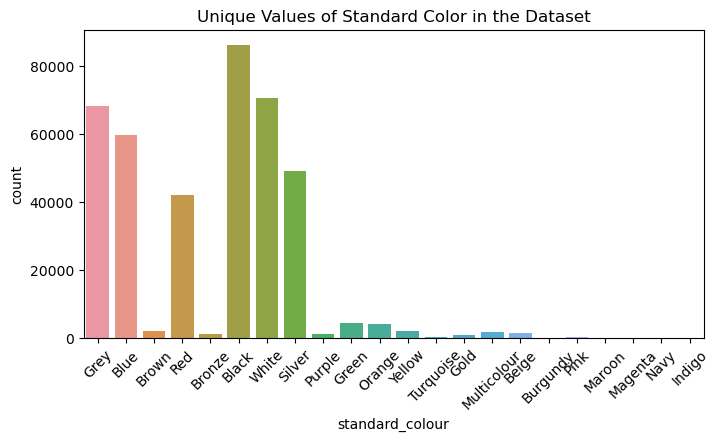

In [111]:
plt.figure(figsize=(8, 4)) 
sns.countplot(x='standard_colour', data=df)
plt.title("Unique Values of Standard Color in the Dataset")
plt.xticks(rotation=45)
plt.show()

* There are more black cars in the dataset followed by white, grey and blue

## Count of Cars by Condition

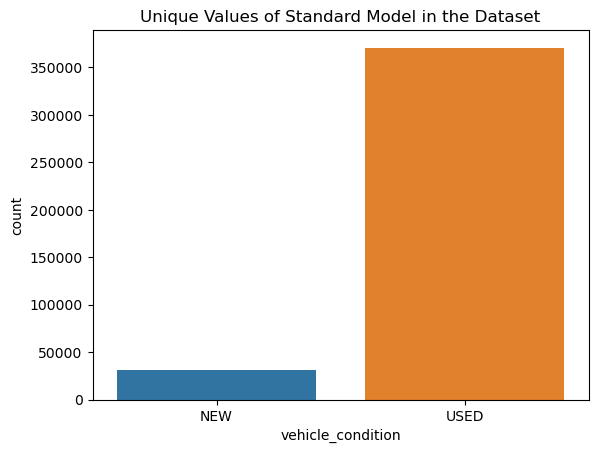

In [112]:
sns.countplot(x='vehicle_condition', data=df)
plt.title("Unique Values of Standard Model in the Dataset")
plt.xticks()
plt.show()

In [31]:
df['vehicle_condition'].unique()

array(['USED'], dtype=object)